In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import cv2
import imghdr
import scipy

In [118]:
train_data_dir = '/content/drive/MyDrive/Cats_Dogs_Project/data/train'
test_data_dir = '/content/drive/MyDrive/Cats_Dogs_Project/data/test'

In [119]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    # horizontal_flip=True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [120]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


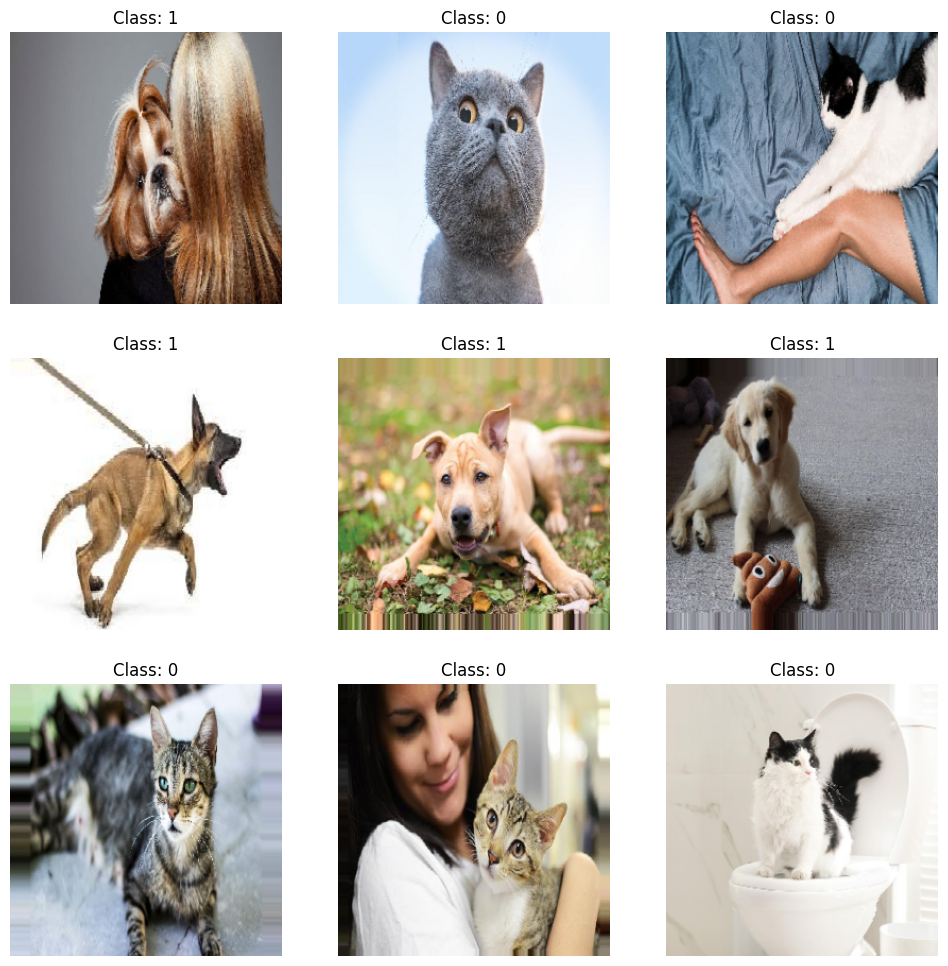

In [ ]:
import matplotlib.pyplot as plt

images, labels = train_generator.next()

plt.figure(figsize=(12, 12))
for i in range(min(9, 9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f'Class: {int(labels[i])}')
    plt.axis('off')
plt.show()

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Fit the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping]
)

In [129]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image_path = '/content/drive/MyDrive/Cats_Dogs_Project/data/test/cats/cat_106.jpg'
img = image.load_img(test_image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [130]:
# Make predictions
predictions = model.predict(img_array)

# Display the predictions
if predictions[0][0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 [==============================] - 0s 261ms/step
It's a cat!


In [131]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

test_image_path = '/content/drive/MyDrive/Cats_Dogs_Project/data/test/cats/cat_106.jpg'
img = Image.open(test_image_path)
img = img.resize((256, 256))  # Resize the image to match the model's expected sizing
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

1/1 [==============================] - 0s 33ms/step


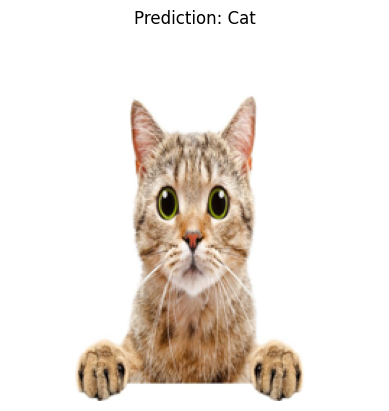

In [132]:
predictions = model.predict(img_array)

plt.imshow(img)
plt.axis('off')

if predictions[0][0] > 0.5:
    plt.title("Prediction: Dog")
else:
    plt.title("Prediction: Cat")

plt.show()

In [133]:
test_image_path = '/content/drive/MyDrive/Cats_Dogs_Project/data/test/dogs/dog_114.jpg'
img = Image.open(test_image_path)
img = img.resize((256, 256))  # Resize the image to match the model's expected sizing
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

1/1 [==============================] - 0s 19ms/step


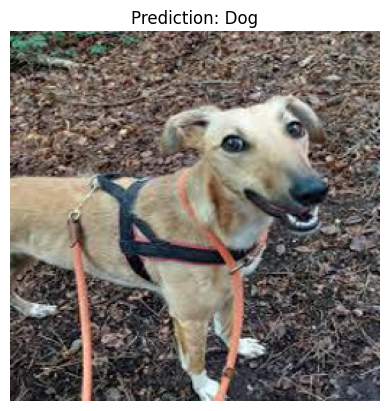

In [134]:
# Make predictions
predictions = model.predict(img_array)

plt.imshow(img)
plt.axis('off')

if predictions[0][0] > 0.5:
    plt.title("Prediction: Dog")
else:
    plt.title("Prediction: Cat")

plt.show()